In [5]:
# ================================
# 0. IMPORTS Y CONFIGURACIÓN
# ================================
from pathlib import Path
import json
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm

from shapely import wkt
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, f1_score, matthews_corrcoef,
    cohen_kappa_score, classification_report
)

In [6]:
from pathlib import Path
import sys

# Detectar raíz del proyecto (donde está la carpeta 'src' y 'Datos')
ROOT_DIR = Path.cwd()
if not (ROOT_DIR / "src").exists():
    # Si estamos dentro de notebooks/ u otra carpeta, subir un nivel
    ROOT_DIR = ROOT_DIR.parent
if not (ROOT_DIR / "src").exists():
    # Como respaldo, subir otro nivel si hiciera falta
    ROOT_DIR = ROOT_DIR.parent

print("ROOT_DIR detectado:", ROOT_DIR)

# Asegurarnos de que 'src' esté en el path de Python
sys.path.append(str(ROOT_DIR))

ROOT_DIR detectado: /Users/sandravz/Documents/xbd


In [7]:
from src.config import EVENTS
from src.dataset import build_dataset
from src.model import train_damage_classifier
from src.data_io import load_image_and_label, load_pre_image_from_post_path
from src.mdm import create_MDM_for_image
from src.spectral import visualize_spectral_indices_pre_post
from src.visualization import plot_pre_post_MDM_with_veg

train / mexico-earthquake -> 3 imágenes
train / santa-rosa-wildfire -> 3 imágenes
Total edificios: 1045
Distribución de clases: [1040    2    0    3]
Clases presentes en validación: [0 3] ['no-damage', 'destroyed']
Matriz de confusión (solo clases presentes):
 [[208   0]
 [  1   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

   no-damage       1.00      1.00      1.00       208
   destroyed       0.00      0.00      0.00         1

    accuracy                           1.00       209
   macro avg       0.50      0.50      0.50       209
weighted avg       0.99      1.00      0.99       209

F1 macro: 0.4988009592326139
MCC: 0.0
Kappa: 0.0
Clases que conoce el modelo: [0 1 3]


/Users/sandravz/Documents/xbd/damagelens/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/sandravz/Documents/xbd/damagelens/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/sandravz/Documents/xbd/damagelens/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

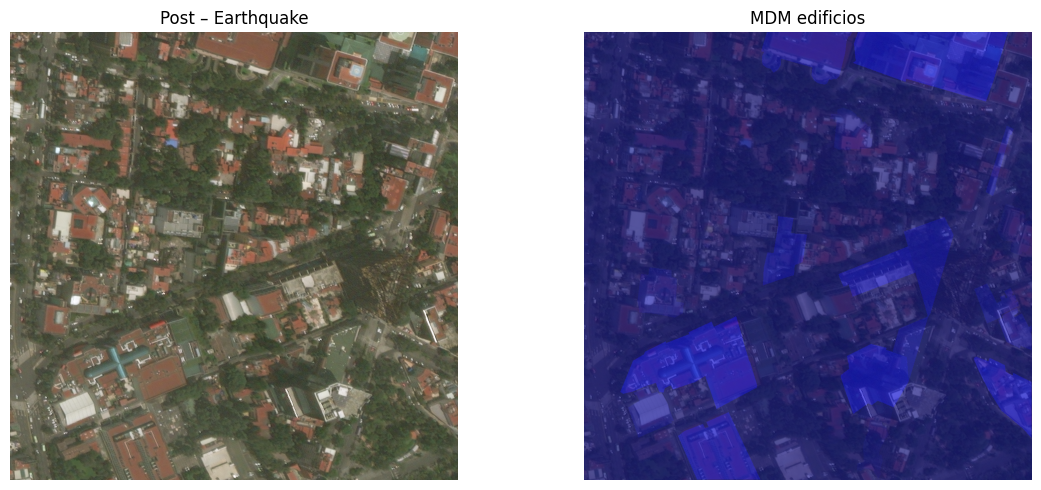

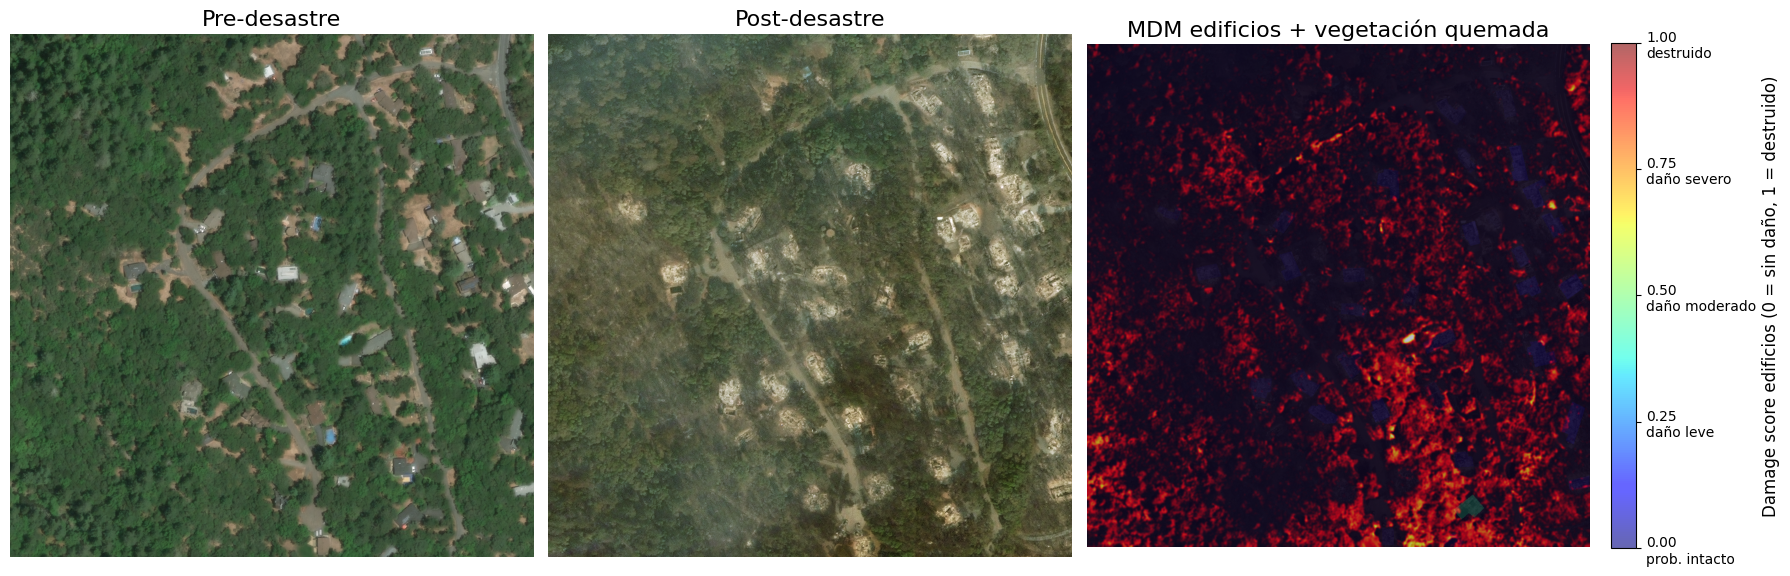

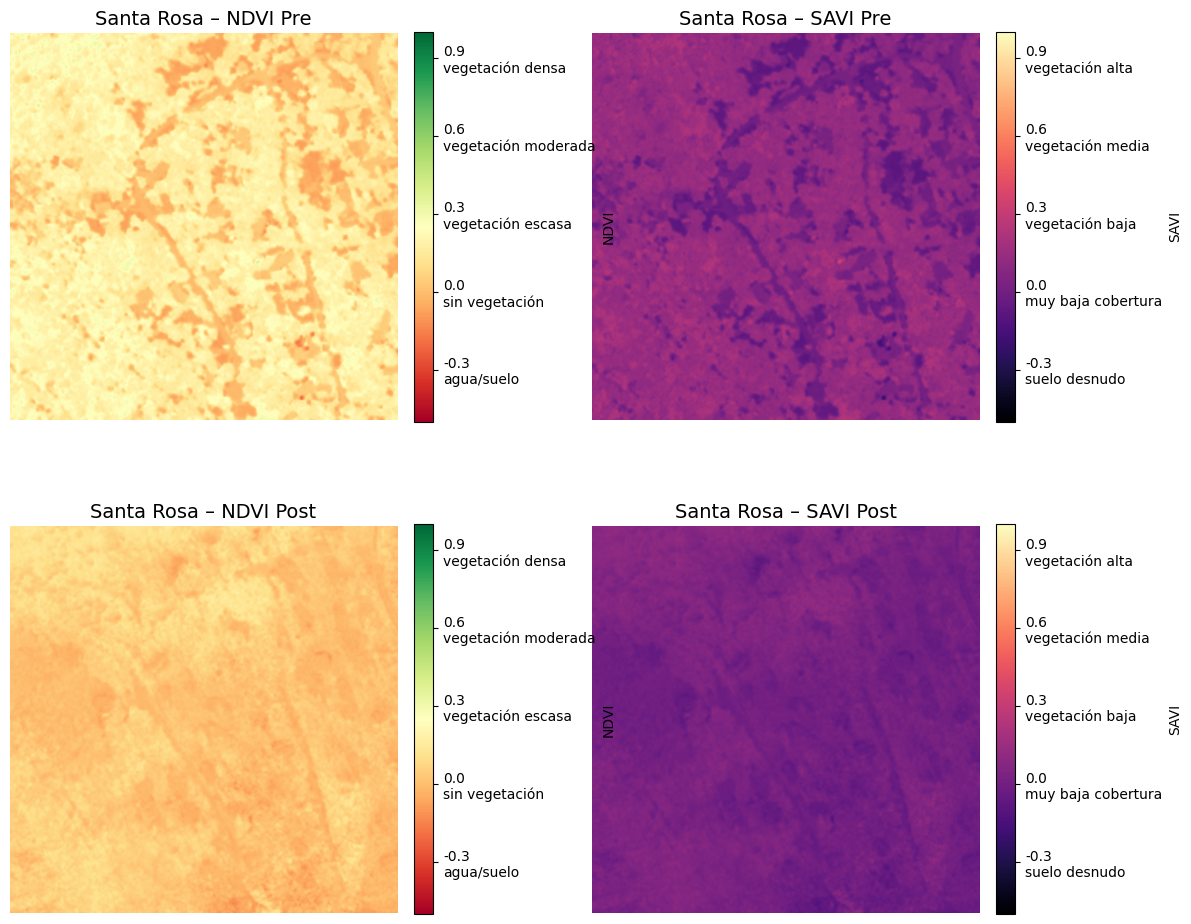

In [8]:
# 1. Construir dataset y entrenar
X, y = build_dataset(EVENTS, split="train", max_images_per_event=3)
clf, metrics = train_damage_classifier(X, y)

# 2. Ejemplo Mexico Earthquake
img_quake, data_quake, img_q_path, lbl_q_path = load_image_and_label(
    "mexico-earthquake", "hold"
)
overlay_quake, hm_quake = create_MDM_for_image(img_quake, data_quake, clf)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img_quake); plt.axis("off"); plt.title("Post – Earthquake")
plt.subplot(1,2,2); plt.imshow(overlay_quake); plt.axis("off"); plt.title("MDM edificios")
plt.tight_layout(); plt.show()

# 3. Ejemplo Santa Rosa
img_post, data_post, img_post_path, lbl_post_path = load_image_and_label(
    "santa-rosa-wildfire", "hold"
)
img_pre = load_pre_image_from_post_path(img_post_path)
overlay_fire, hm_fire = create_MDM_for_image(img_post, data_post, clf)

plot_pre_post_MDM_with_veg(img_pre, img_post, hm_fire)
if img_pre is not None:
    visualize_spectral_indices_pre_post(img_pre, img_post, title_prefix="Santa Rosa – ")